<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 166 images belonging to 2 classes.
Found 23 images belonging to 2 classes.
Epoch 1/5
6/6 [==============================] - 63s 9s/step - loss: 3.3598 - accuracy: 0.7229 - val_loss: 1.3344 - val_accuracy: 0.9130
Epoch 2/5
6/6 [==============================] - 53s 9s/step - loss: 1.0691 - accuracy: 0.7530 - val_loss: 1.0264 - val_accuracy: 0.1739
Epoch 3/5
6/6 [==============================] - 58s 9s/step - loss: 0.5755 - accuracy: 0.6928 - val_loss: 0.3176 - val_accuracy: 0.9130
Epoch 4/5
6/6 [==============================] - 59s 9s/step - loss: 0.4863 - accuracy: 0.8675 - val_loss: 0.2719 - val_accuracy: 0.9130
Epoch 5/5
6/6 [==============================] - 60s 9s/step - loss: 0.3183 - accuracy: 0.8735 - val_loss: 0.3111 - val_accuracy: 0.9130


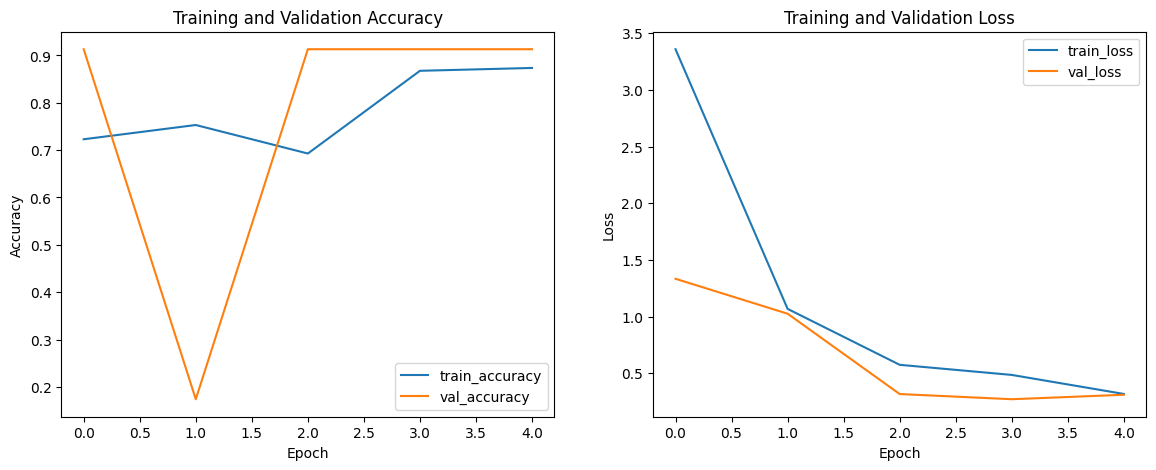

1/1 [==============================] - 7s 7s/step


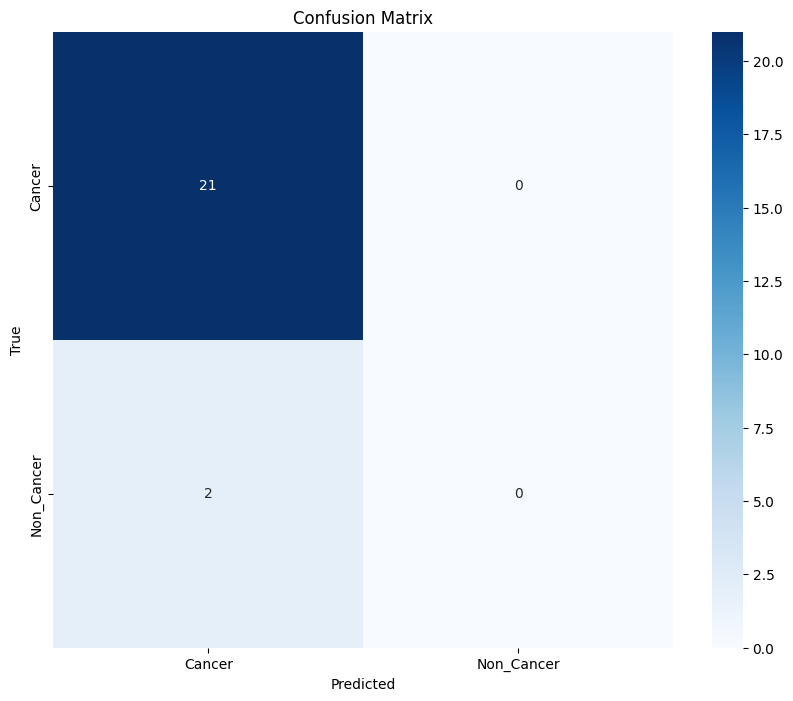

Classification Report
{'Cancer': {'precision': 0.9130434782608695, 'recall': 1.0, 'f1-score': 0.9545454545454545, 'support': 21}, 'Non_Cancer': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2}, 'accuracy': 0.9130434782608695, 'macro avg': {'precision': 0.45652173913043476, 'recall': 0.5, 'f1-score': 0.47727272727272724, 'support': 23}, 'weighted avg': {'precision': 0.8336483931947068, 'recall': 0.9130434782608695, 'f1-score': 0.8715415019762844, 'support': 23}}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

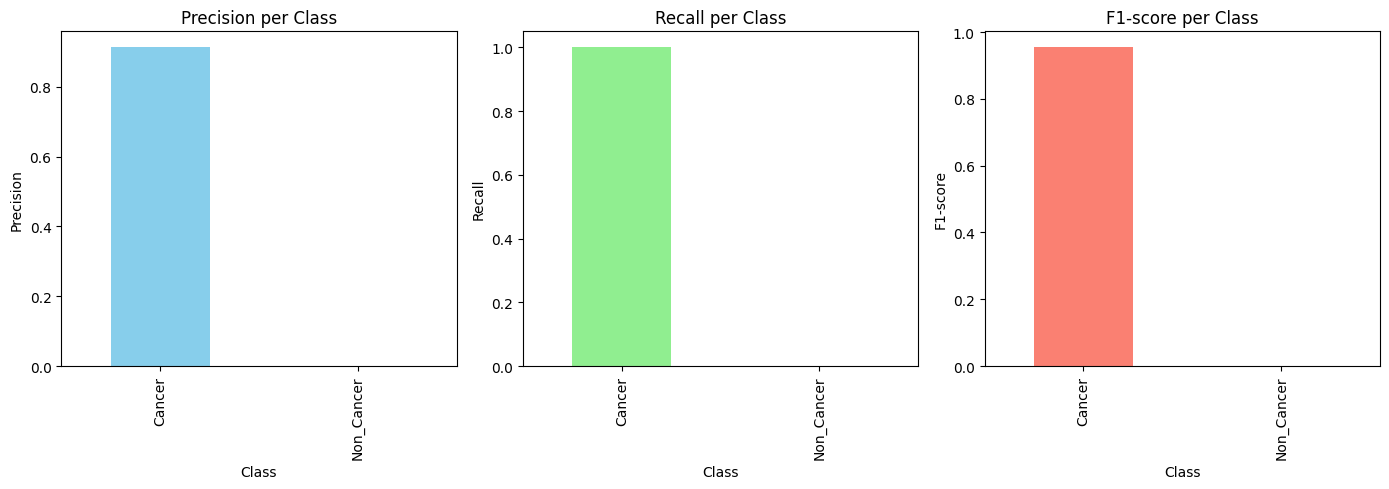

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Step 3: Define paths
# Replace these paths with your dataset path in Google Drive
train_data_dir = '/content/drive/MyDrive/Oral_Cancer/Cancer_Train'

validation_data_dir = '/content/drive/MyDrive/Oral_Cancer/Cancer_Validation'

# Step 4: Image data generators
# Note: Adjust target_size and batch_size according to your dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Step 5: Load the InceptionV3 model, pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Step 6: Add custom layers on top of InceptionV3
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Step 8: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)

# Step 10: Save the model
#model.save('/content/drive/MyDrive/your_model_path/inceptionv3_model.h5')

# Step 11: Plot performance graphs
# Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 12: Confusion Matrix and Classification Report
# Predict the values from the validation dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# **Fix:** Explicitly define the class names
cm_plot_labels = ['Cancer', 'Non_Cancer']  # Replace with your actual class names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print('Classification Report')
# Use the explicitly defined class names
print(classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels, output_dict=True))

# Additional performance graphs
# Precision, Recall, and F1-score for each class
report = classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(14, 5))

# Precision
plt.subplot(1, 3, 1)
report_df['precision'][:-3].plot(kind='bar', color='skyblue')
plt.title('Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision')

# Recall
plt.subplot(1, 3, 2)
report_df['recall'][:-3].plot(kind='bar', color='lightgreen')
plt.title('Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall')

# F1-score
plt.subplot(1, 3, 3)
report_df['f1-score'][:-3].plot(kind='bar', color='salmon')
plt.title('F1-score per Class')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()


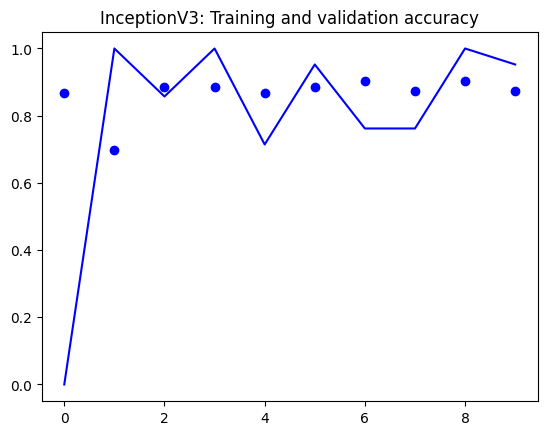

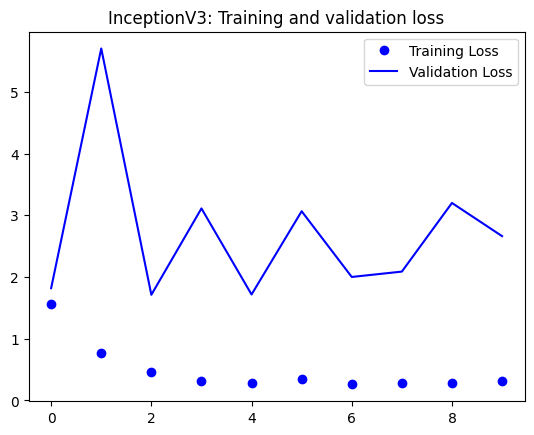

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('InceptionV3: Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('InceptionV3: Training and validation loss')
plt.legend()

plt.show()